# Influences of Budget on a Movie's Success

In this section, we will explore an important question: Does a higher budget imply better revenue and ratings, and therefore, greater movie success? While it might seem intuitive that a larger budget would lead to greater success, the relationship between a movie's financial investment and its performance is more complex. We'll investigate whether bigger budgets truly correlate with higher box office earnings and better ratings, or if other factors play a more significant role in determining a movie's success. By understanding this connection, we can gain insights into the financial dynamics of the film industry.

To begin our exploration, we will first create a master ratings table by combining the ratings data from multiple sources—Metacritic, IMDb, and Rotten Tomatoes. This will give us a comprehensive view of how a movie is received across different platforms. Additionally, we will gather the budget and revenue information from the IMDb table, as it contains the most reliable financial data for our analysis. By combining these datasets, we aim to better understand whether movies with higher budgets tend to perform better in terms of both revenue and ratings, providing a clearer picture of what factors contribute to a film's success.








In [1]:
# For dataframe manipulation 
import pandas as pd
import pickle

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress the DeprecationWarning for bar graph hues
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
# Importing IMDB
file_path = "../../pickles/imdb_data.pkl" 
with open(file_path, 'rb') as f:
    df_imdb = pickle.load(f)
    
df_imdb.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [6]:
# some columns are not necessary for this section's analyses, so we will remove them for simplicity 
df_imdb = df_imdb.drop(columns=['date_x', 'genre','overview','crew','status','orig_lang','country','orig_title'])
df_imdb.head()

,names,score,budget_x,revenue
0,Creed III,73.0,75000000.0,2.716167e+08
1,Avatar: The Way of Water,78.0,460000000.0,2.316795e+09
2,The Super Mario Bros. Movie,76.0,100000000.0,7.244590e+08
3,Mummies,70.0,12300000.0,3.420000e+07
4,Supercell,61.0,77000000.0,3.409420e+08


In [7]:
# Importing Metacritic
file_path = "../../pickles/metacritic_df.pkl" 
with open(file_path, 'rb') as f:
    df_metacritic = pickle.load(f)
    
df_metacritic.head()

,id,metascore,rating,release_date,sort_no,summary,title,user_score
0,549123,94,TV-14,1989-07-26,101,A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9
1,522228,94,PG-13,2000-12-08,102,"In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2
2,550614,94,G,1970-09-11,103,"In a French forest in 1798, a child is found w...",The Wild Child,6.5
3,549303,94,TV-PG,1943-01-15,104,A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2
4,539956,94,PG,2015-06-19,105,"Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7


In [8]:
# some columns are not necessary for this section's analyses, so we will remove them for simplicity 
df_metacritic = df_metacritic.drop(columns=['id','release_date','sort_no','summary','rating'])
df_metacritic.head()

,metascore,title,user_score
0,94,Grave of the Fireflies (1988),8.9
1,94,"Crouching Tiger, Hidden Dragon",8.2
2,94,The Wild Child,6.5
3,94,Shadow of a Doubt,8.2
4,94,Inside Out,8.7


Most of the scores are out of 100, so let us standardize the user_score:

In [9]:
df_metacritic['user_score'] = pd.to_numeric(df_metacritic['user_score'], errors='coerce')
df_metacritic['user_score'] = df_metacritic['user_score'] * 10
df_metacritic.head()

,metascore,title,user_score
0,94,Grave of the Fireflies (1988),89.0
1,94,"Crouching Tiger, Hidden Dragon",82.0
2,94,The Wild Child,65.0
3,94,Shadow of a Doubt,82.0
4,94,Inside Out,87.0


As a note, it might be more insightful to experiment with the weights of movie critic scores and people scores in the final deliverable. What are your thoughts on this as a TA? For P2, we plan to keep things simple by taking the average of the critic score and people score.

In [10]:
# Creating the 'score_meta' column by averaging 'metascore' and 'user_score'
df_metacritic['score_meta'] = df_metacritic[['metascore', 'user_score']].mean(axis=1)
# Dropping the unnecessary columns
df_metacritic = df_metacritic.drop(columns=['metascore', 'user_score'])

df_metacritic.head()

,title,score_meta
0,Grave of the Fireflies (1988),91.5
1,"Crouching Tiger, Hidden Dragon",88.0
2,The Wild Child,79.5
3,Shadow of a Doubt,88.0
4,Inside Out,90.5


In [11]:
# Importing Rotten Tomatoes
file_path = "../../pickles/rotten_tomatoes.pkl" 
with open(file_path, 'rb') as f:
    df_tomatoes = pickle.load(f)
    
df_tomatoes.head()

,Unnamed: 0,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,...,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew,link
0,0,Black Panther,2018,"After the death of his father, T'Challa return...",96,79.0,Black Panther elevates superhero cinema to thr...,519,"50,000+",Action & Adventure,...,"Feb 16, 2018 wide","May 2, 2018",$700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",http://www.rottentomatoes.com/m/black_panther_...
1,1,Avengers: Endgame,2019,"Adrift in space with no food or water, Tony St...",94,90.0,"Exciting, entertaining, and emotionally impact...",538,"50,000+",Action & Adventure,...,"Apr 26, 2019 wide","Jul 30, 2019",$858.4M,3h 1m,"Marvel Studios, Walt Disney Pictures","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),Marvel Cinematic Universe,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",http://www.rottentomatoes.com/m/avengers_endgame
2,2,Mission: Impossible -- Fallout,2018,Ethan Hunt and the IMF team join forces with C...,97,88.0,"Fast, sleek, and fun, Mission: Impossible - Fa...",433,"10,000+",Action & Adventure,...,"Jul 27, 2018 wide","Nov 20, 2018",$220.1M,2h 27m,"Bad Robot, Tom Cruise","DTS, Dolby Atmos, Dolby Digital",Scope (2.35:1),NaN,"Tom Cruise, Henry Cavill, Ving Rhames, Simon P...",http://www.rottentomatoes.com/m/mission_imposs...
3,3,Mad Max: Fury Road,2015,"Years after the collapse of civilization, the ...",97,86.0,With exhilarating action and a surprising amou...,427,"100,000+",Action & Adventure,...,"May 15, 2015 wide","Aug 10, 2016",$153.6M,2h,"Kennedy Miller Mitchell, Village Roadshow Pict...",Dolby Atmos,Scope (2.35:1),NaN,"Tom Hardy, Charlize Theron, Nicholas Hoult, Hu...",http://www.rottentomatoes.com/m/mad_max_fury_road
4,4,Spider-Man: Into the Spider-Verse,2018,"Bitten by a radioactive spider in the subway, ...",97,93.0,Spider-Man: Into the Spider-Verse matches bold...,387,"10,000+",Action & Adventure,...,"Dec 14, 2018 wide","Mar 7, 2019",$190.2M,1h 57m,"Lord Miller, Sony Pictures Animation, Pascal P...","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),NaN,"Shameik Moore, Hailee Steinfeld, Mahershala Al...",http://www.rottentomatoes.com/m/spider_man_int...


In [12]:
# some columns are not necessary for this section's analyses, so we will remove them for simplicity 
df_tomatoes = df_tomatoes.drop(columns=['view_the_collection','writer','rating','genre','original_language','director','producer','Unnamed: 0','year','synopsis','consensus','type','release_date_(theaters)','release_date_(streaming)','runtime','production_co','sound_mix','aspect_ratio','crew','link'])
df_tomatoes.head()

,title,critic_score,people_score,total_reviews,total_ratings,box_office_(gross_usa)
0,Black Panther,96,79.0,519,"50,000+",$700.2M
1,Avengers: Endgame,94,90.0,538,"50,000+",$858.4M
2,Mission: Impossible -- Fallout,97,88.0,433,"10,000+",$220.1M
3,Mad Max: Fury Road,97,86.0,427,"100,000+",$153.6M
4,Spider-Man: Into the Spider-Verse,97,93.0,387,"10,000+",$190.2M


Similarly, it might be more insightful to experiment with the weights of total ratings, critic scores, and people scores in the final deliverable. But for P2, we plan to keep things simple by taking the average of the critic score and people score.

In [13]:
# Creating the 'score' column by averaging 'critic_score' and 'people_score'
df_tomatoes['score_tom'] = df_tomatoes[['critic_score', 'people_score']].mean(axis=1)
# Dropping the unnecessary columns
df_tomatoes = df_tomatoes.drop(columns=['critic_score', 'people_score', 'total_reviews', 'total_ratings'])

df_tomatoes.head()


,title,box_office_(gross_usa),score_tom
0,Black Panther,$700.2M,87.5
1,Avengers: Endgame,$858.4M,92.0
2,Mission: Impossible -- Fallout,$220.1M,92.5
3,Mad Max: Fury Road,$153.6M,91.5
4,Spider-Man: Into the Spider-Verse,$190.2M,95.0


Now let us import our main movies dataset:

In [14]:
# Importing the CMU Movies Dataframe that we created in a different pipeline
file_path = "../../pickles/cmu_movies_df.pkl" 
with open(file_path, 'rb') as f:
    df_movies = pickle.load(f)
    
df_movies.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie Name,Release Date,Box Office Revenue,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,Genre Freebase ID,Genre Name
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...","[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/02n4kr, /m/03bxz7, /m/07s9rl0, /m/0hj3n01]","[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[/m/05f_3],[Norwegian Language],[/m/05b4w],[Norway],"[/m/0lsxr, /m/07s9rl0]","[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[/m/02h40lc],[English Language],[/m/07ssc],[United Kingdom],"[/m/01jfsb, /m/0glj9q, /m/09blyk]","[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[/m/04306rv],[German Language],[/m/0345h],[Germany],[/m/07s9rl0],[Drama]


In [15]:
# some columns are not necessary for this section's analyses, so we will remove them for simplicity 
df_movies = df_movies.drop(columns=['Wikipedia Movie ID','Freebase Movie ID','Release Date','Runtime','Language Freebase ID','Language Name','Country Freebase ID','Country Name','Genre Freebase ID','Genre Name'])
df_movies.head()

,Movie Name,Box Office Revenue
0,Ghosts of Mars,14010832.0
1,Getting Away with Murder: The JonBenét Ramsey ...,NaN
2,Brun bitter,NaN
3,White Of The Eye,NaN
4,A Woman in Flames,NaN


Now that we've imported our pickle dataframes, let's check for duplicates to ensure a smoother merging process.

In [16]:
df_imdb[df_imdb.duplicated(subset='names')]
df_metacritic[df_metacritic.duplicated(subset='title')]
df_tomatoes[df_tomatoes.duplicated(subset='title')]
df_movies[df_movies.duplicated(subset='Movie Name')]


,Movie Name,Box Office Revenue
669,The Bridge,NaN
1223,Harlow,NaN
2139,Don Quixote,NaN
2198,Ten Little Indians,NaN
2355,After the Storm,NaN
...,...,...
81716,The Kreutzer Sonata,NaN
81719,Mirage,NaN
81727,"The Time, the Place and the Girl",NaN
81733,The Ghost Train,NaN


Okay! There seem to be a few duplicates, so let us remove them for a smoother merging in the next step.

In [17]:
df_imdb = df_imdb.drop_duplicates(subset='names')
df_metacritic = df_metacritic.drop_duplicates(subset='title')
df_tomatoes = df_tomatoes.drop_duplicates(subset='title')
df_movies = df_movies.drop_duplicates(subset='Movie Name')

Now, let's begin the merging process. First, we will standardize the movie name columns across each DataFrame to ensure they match and facilitate easier merging

In [18]:
df_imdb = df_imdb.rename(columns={'names': 'movie_name','score':'score_imdb'})
df_metacritic = df_metacritic.rename(columns={'title': 'movie_name'})
df_tomatoes = df_tomatoes.rename(columns={'title': 'movie_name'})
df_movies = df_movies.rename(columns={'Movie Name': 'movie_name'})


In [19]:
# Merge dataframes on 'movie_name'
df_merged = pd.merge(df_movies, df_tomatoes, on='movie_name', how='left')
df_merged = pd.merge(df_merged, df_metacritic, on='movie_name', how='left')
df_merged = pd.merge(df_merged, df_imdb, on='movie_name', how='left')

# Display the result
# df_merged = df_merged.drop(columns=['score_x','score_y'])
df_merged.head()



,movie_name,Box Office Revenue,box_office_(gross_usa),score_tom,score_meta,score_imdb,budget_x,revenue
0,Ghosts of Mars,14010832.0,NaN,NaN,56.0,52.0,28000000.0,14010832.0
1,Getting Away with Murder: The JonBenét Ramsey ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brun bitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,White Of The Eye,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A Woman in Flames,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We used a left merge in this cascade of merges because it ensures that all the rows from the left DataFrame (starting with df_imdb) are preserved, even if there are no matching rows in the right DataFrames, while aligning the relevant data from each source.

Now, let’s combine the 'Box Office Revenue' and 'box_office_(gross_usa)' columns by taking the average. If one of the values is NaN, we’ll keep the non-NaN value. If both are NaN, the result will be NaN

In [20]:
# Converting the columns to numeric
df_merged['Box Office Revenue'] = pd.to_numeric(df_merged['Box Office Revenue'], errors='coerce')
df_merged['box_office_(gross_usa)'] = pd.to_numeric(df_merged['box_office_(gross_usa)'], errors='coerce')

# Taking the average or keeping non-NaN values
df_merged['box_office'] = df_merged[['Box Office Revenue', 'box_office_(gross_usa)']].mean(axis=1)

# If both values are NaN, the result will be NaN
df_merged['box_office'] = df_merged['box_office'].where(df_merged[['Box Office Revenue', 'box_office_(gross_usa)']].notna().any(axis=1))

# Removing unnecessary columns
df_merged = df_merged.drop(columns=['Box Office Revenue', 'box_office_(gross_usa)'])

df_merged.head()


,movie_name,score_tom,score_meta,score_imdb,budget_x,revenue,box_office
0,Ghosts of Mars,NaN,56.0,52.0,28000000.0,14010832.0,14010832.0
1,Getting Away with Murder: The JonBenét Ramsey ...,NaN,NaN,NaN,NaN,NaN,NaN
2,Brun bitter,NaN,NaN,NaN,NaN,NaN,NaN
3,White Of The Eye,NaN,NaN,NaN,NaN,NaN,NaN
4,A Woman in Flames,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df_merged.to_pickle('movie_scores.pkl')

Finally, let us grab the average scores of the three platforms!

In [21]:
df_merged['avg_score'] = df_merged[['score_tom', 'score_meta', 'score_imdb']].mean(axis=1)
df_merged.head()

,movie_name,score_tom,score_meta,score_imdb,budget_x,revenue,box_office,avg_score
0,Ghosts of Mars,NaN,56.0,52.0,28000000.0,14010832.0,14010832.0,54.0
1,Getting Away with Murder: The JonBenét Ramsey ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brun bitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,White Of The Eye,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A Woman in Flames,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, let us plot the box office against the average score to see if there is any correlation between the two variables

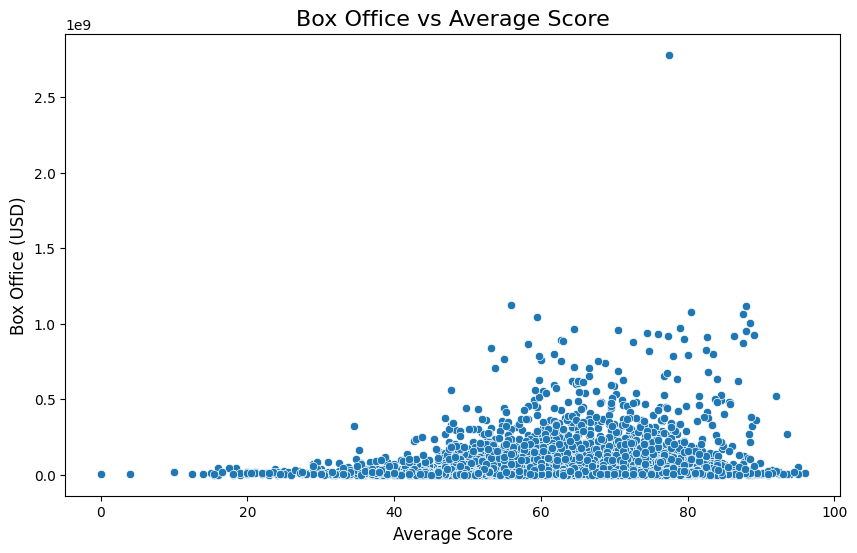

In [31]:
# Removing rows where 'avg_score' or 'box_office' is NaN
df_filtered = df_merged.dropna(subset=['avg_score', 'box_office'])

# Creating a scatter plot of box_office vs avg_score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='avg_score', y='box_office')
plt.title('Box Office vs Average Score', fontsize=16)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Box Office (USD)', fontsize=12)
plt.show()

Hmm okay, let us now do the same but between revenue and average score...

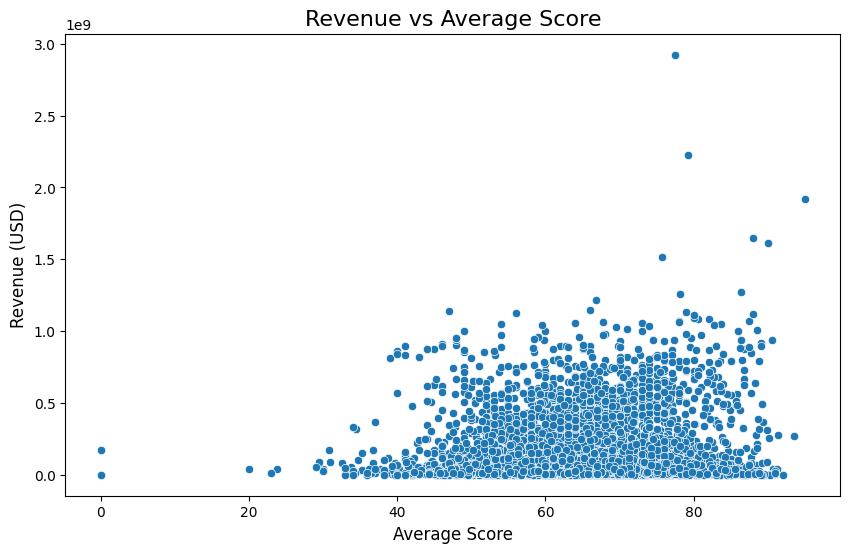

In [32]:
# Removing rows where revenue is NaN
df_filtered_pt2 = df_merged.dropna(subset=['avg_score','revenue'])

# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_pt2, x='avg_score', y='revenue')
plt.title('Revenue vs Average Score', fontsize=16)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.show()

Hmmm alright, what about budget and avg_score...

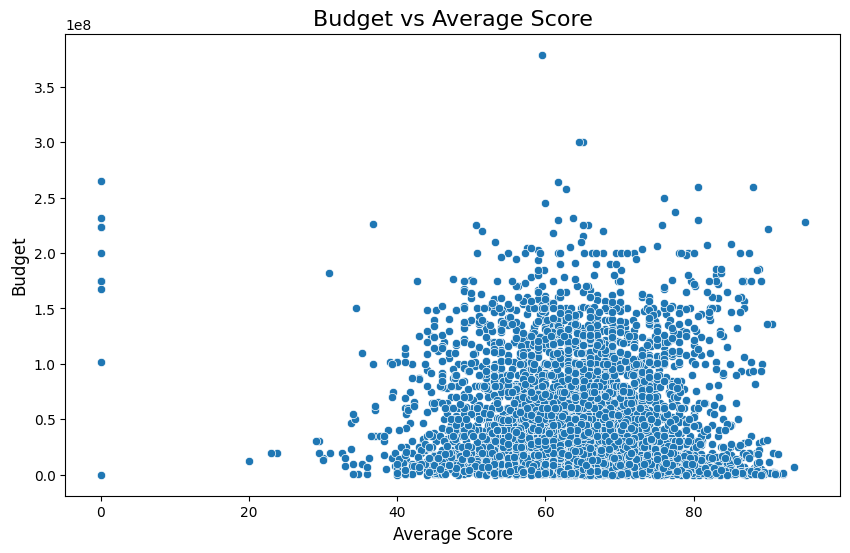

In [33]:
# Removing rows where budget is NaN
df_filtered_pt3 = df_merged.dropna(subset=['avg_score','budget_x'])

# Creating a scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_pt3, x='avg_score', y='budget_x')
plt.title('Budget vs Average Score', fontsize=16)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Budget', fontsize=12)
plt.show()

In [ ]:
# Removing rows where budget is NaN
df_filtered_pt4 = df_merged.dropna(subset=['revenue','budget_x'])

# Creating a scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_pt4, x='revenue', y='budget_x')
plt.title('Budget vs Average Score', fontsize=16)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Budget', fontsize=12)
plt.show()